# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
data_descriptions = pd.read_csv('data_descriptions.csv')
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly ba...
2,TotalCharges,Feature,float,The total charges incurred by the user over th...
3,SubscriptionType,Feature,object,The type of subscription chosen by the user (B...
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paper...
6,ContentType,Feature,string,The type of content preferred by the user (Mov...
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the s...
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV,..."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching c...


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [6]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [7]:
train_df.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [9]:
train_df.isna().any()

AccountAge                  False
MonthlyCharges              False
TotalCharges                False
SubscriptionType            False
PaymentMethod               False
PaperlessBilling            False
ContentType                 False
MultiDeviceAccess           False
DeviceRegistered            False
ViewingHoursPerWeek         False
AverageViewingDuration      False
ContentDownloadsPerMonth    False
GenrePreference             False
UserRating                  False
SupportTicketsPerMonth      False
Gender                      False
WatchlistSize               False
ParentalControl             False
SubtitlesEnabled            False
CustomerID                  False
Churn                       False
dtype: bool

In [10]:
print(train_df["PaymentMethod"].unique())
train_df["PaymentMethod"].nunique()

['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']


4

In [11]:
train_df["Churn"].value_counts()

0    199605
1     44182
Name: Churn, dtype: int64

In [12]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'],errors='coerce')
train_df['TotalCharges'] = train_df['TotalCharges'].astype("float")

In [13]:
train_df["ParentalControl"]

0          No
1          No
2         Yes
3         Yes
4          No
         ... 
243782    Yes
243783     No
243784    Yes
243785     No
243786    Yes
Name: ParentalControl, Length: 243787, dtype: object

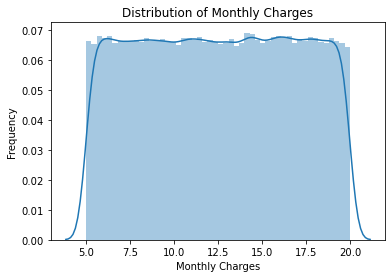

In [14]:
# Data exploration and visualization
# Example: Visualize distribution of monthly charges
sns.distplot(train_df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

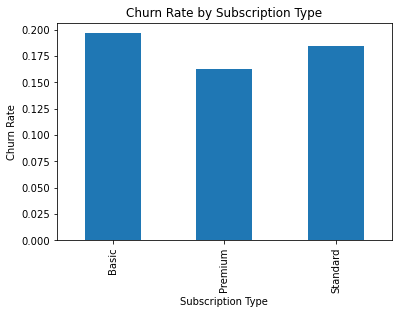

In [15]:
# Example: Churn rate by subscription type
churn_rate = train_df.groupby('SubscriptionType')['Churn'].mean()
churn_rate.plot(kind='bar')
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate')
plt.show()

In [16]:
# Data preprocessing
# Identifying categorical and numerical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('CustomerID') 
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Churn')

In [17]:
categorical_columns

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled']

In [18]:
numerical_columns

['AccountAge',
 'MonthlyCharges',
 'TotalCharges',
 'ViewingHoursPerWeek',
 'AverageViewingDuration',
 'ContentDownloadsPerMonth',
 'UserRating',
 'SupportTicketsPerMonth',
 'WatchlistSize']

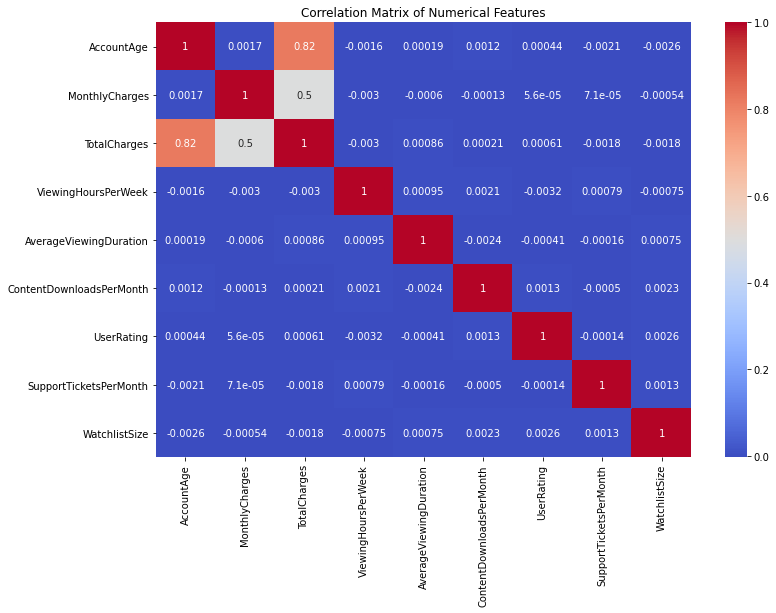

,Feature,Importance
4,AverageViewingDuration,0.110373
3,ViewingHoursPerWeek,0.105183
1,MonthlyCharges,0.098042
2,TotalCharges,0.095226
0,AccountAge,0.094824
6,UserRating,0.086712
5,ContentDownloadsPerMonth,0.082982
8,WatchlistSize,0.062598
7,SupportTicketsPerMonth,0.047333
17,MultiDeviceAccess_Yes,0.013849


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Perform correlation analysis for numerical features
correlation_matrix = train_df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Use RandomForestClassifier to find feature importance for both numerical and categorical features
lr_model = RandomForestClassifier()
# For categorical data, we need to encode it first
train_df_encoded = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)
features = train_df_encoded.drop(['Churn', 'CustomerID'], axis=1)
labels = train_df['Churn']

# Fit the model
lr_model.fit(features, labels)

# Get feature importances
importances = lr_model.feature_importances_

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Displaying feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head(10)  # Displaying top 10 features



In [20]:
# Print the column names of feature_importance_df
print(feature_importance_df.columns)


Index(['Feature', 'Importance'], dtype='object')


In [21]:
# Filter your numerical and categorical columns
top_features = feature_importance_df.head(10)['Feature'].tolist()
filtered_numerical_columns = [col for col in numerical_columns if col in top_features]
filtered_categorical_columns = [col for col in categorical_columns if col in top_features]

In [22]:
# Create transformers for preprocessing
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

In [23]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, filtered_categorical_columns),
        ('num', numerical_transformer, filtered_numerical_columns)
    ]
)

In [24]:
# 5. Training a model
# Create a pipeline with preprocessing and logistic regression model
logistic_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

In [25]:
# Create a pipeline with preprocessing and KNN classifier
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier())])

In [26]:
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [27]:
selected_features = [feature for feature in top_features if feature in train_df.columns]
selected_features

['AverageViewingDuration',
 'ViewingHoursPerWeek',
 'MonthlyCharges',
 'TotalCharges',
 'AccountAge',
 'UserRating',
 'ContentDownloadsPerMonth',
 'WatchlistSize',
 'SupportTicketsPerMonth']

In [28]:
# Preparing the data with selected features
X_selected = train_df[selected_features]
y_selected = train_df['Churn']

In [29]:
X_selected

,AverageViewingDuration,ViewingHoursPerWeek,MonthlyCharges,TotalCharges,AccountAge,UserRating,ContentDownloadsPerMonth,WatchlistSize,SupportTicketsPerMonth
0,63.531377,36.758104,11.055215,221.104302,20,2.176498,10,3,4
1,25.725595,32.450568,5.175208,294.986882,57,3.478632,18,23,8
2,57.364061,7.395160,12.106657,883.785952,73,4.238824,23,1,6
3,131.537507,27.960389,7.263743,232.439774,32,4.276013,30,24,2
4,45.356653,20.083397,16.953078,966.325422,57,3.616170,20,0,4
...,...,...,...,...,...,...,...,...,...
243782,80.367312,13.502729,9.639902,742.272460,77,3.697451,47,8,1
243783,59.818441,24.963291,13.049257,1526.763053,117,1.449742,35,20,4
243784,176.186095,10.628728,14.514569,1640.146267,113,4.012217,44,13,6
243785,153.386315,30.466782,18.140555,126.983887,7,2.135789,36,5,7


In [30]:
X_test_selected = test_df.drop(columns=['CustomerID'])
X_test_selected = X_test_selected[selected_features]

In [31]:
X_test_selected

,AverageViewingDuration,ViewingHoursPerWeek,MonthlyCharges,TotalCharges,AccountAge,UserRating,ContentDownloadsPerMonth,WatchlistSize,SupportTicketsPerMonth
0,122.274031,29.126308,17.869374,679.036195,38,3.522724,42,23,2
1,57.093319,36.873729,9.912854,763.289768,77,2.021545,43,22,2
2,140.414001,7.601729,15.019011,75.095057,5,4.806126,14,22,2
3,177.002419,35.586430,15.357406,1351.451692,88,4.943900,14,23,0
4,70.308376,23.503651,12.406033,1128.949004,91,2.846880,6,0,6
...,...,...,...,...,...,...,...,...,...
104475,135.445204,19.189141,17.348236,1387.858873,80,1.411831,35,14,7
104476,114.868640,30.986604,8.275459,165.509180,20,2.783849,17,8,2
104477,109.583153,7.236303,18.134343,1922.240365,106,2.991527,31,12,1
104478,115.153570,25.809285,19.774010,909.604454,46,4.998019,1,12,0


In [32]:
# Fitting the model
logistic_model.fit(X_selected, y_selected)

# Making predictions on the test set
predicted_probabilities = logistic_model.predict_proba(X_test_selected)[:, 1]
predicted_probabilities

array([0.10361696, 0.03946396, 0.40059945, ..., 0.08619133, 0.25402234,
       0.01618472])

In [33]:
from sklearn.model_selection import cross_val_score


# Cross-validation
logistic_scores = cross_val_score(logistic_model, X_selected, y_selected, cv=5, scoring='roc_auc')
knn_scores = cross_val_score(knn_model, X_selected, y_selected, cv=5, scoring='roc_auc')
rf_scores = cross_val_score(random_forest_model, X_selected, y_selected, cv=5, scoring='roc_auc')
# Calculate the average performance across the folds
logistic_performance = logistic_scores.mean()
knn_performance = knn_scores.mean()
rf_performance = rf_scores.mean()

print("Logistic Regression ROC-AUC:", logistic_performance)
print("KNN ROC-AUC:", knn_performance)
print("random forest ROC-AUC:", rf_performance)


Logistic Regression ROC-AUC: 0.7465655305493789
KNN ROC-AUC: 0.6436138327547012
random forest ROC-AUC: 0.7186078102842651


In [34]:
# Creating the prediction_df dataframe for submission
prediction_df = pd.DataFrame({
    'CustomerID': test_df['CustomerID'],
    'predicted_probability': predicted_probabilities
})

In [35]:
# Display the first few rows of prediction_df
prediction_df.head()

,CustomerID,predicted_probability
0,O1W6BHP6RM,0.103617
1,LFR4X92X8H,0.039464
2,QM5GBIYODA,0.400599
3,D9RXTK2K9F,0.038423
4,ENTCCHR1LR,0.150783


In [36]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [37]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [39]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells
print(submission.shape[0])
assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

104480


In [40]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'